In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RandomAction:
    def __init__(self, n_states=19, left_reward=-1):
        self.n_states = n_states
        self.left_reward = left_reward
        self.reset()

    def reset(self):
        self.state = self.n_states // 2
        return self.state

    def step(self):
        action = np.random.choice([-1, 1])
        self.state += action
        if self.state < 0:
            return self.state, self.left_reward, True
        elif self.state >= self.n_states:
            return self.state, 1, True
        return self.state, 0, False

In [3]:
class n_TD:
    def __init__(self, n, alpha, V_init=0, do=False, left_reward=-1, n_states=19):
        self.n = n
        self.alpha = alpha
        self.V = np.zeros(19) + V_init
        self.left_reward = left_reward
        self.n_states = n_states
        self.gamma = 1
        if do:
            np.random.seed(4)
            self.do()
    
    def do(self):
        env = RandomAction(left_reward=self.left_reward, n_states=self.n_states)
        episodes = 10000

        for episode in range(episodes):
            states = []
            rewards = []
            state = env.reset()
            states.append(state)

            t = 0
            T = 100000
            while True:
                if t < T:
                    state, reward, done = env.step()
                    states.append(state)
                    rewards.append(reward)
                    if done:
                        T = t + 1
                tau = t - self.n + 1
                if tau >= 0:
                    G = sum([self.gamma ** (i-tau) * rewards[i] for i in range(tau, min(tau+self.n, T))])
                    if tau + self.n < T:
                        G += self.gamma ** self.n * self.V[states[tau + self.n]]
                    self.V[states[tau]] += self.alpha * (G - self.V[states[tau]])
                if tau == T - 1:
                    break
                t += 1

In [4]:
class n_TD_modified:
    def __init__(self, n, alpha, V_init=0, do=False, left_reward=-1, n_states=19):
        self.n = n
        self.alpha = alpha
        self.V = np.zeros(19) + V_init
        self.left_reward = left_reward
        self.n_states = n_states
        self.gamma = 1
        if do:        
            np.random.seed(4)
            self.do()
    
    def do(self):
        env = RandomAction(left_reward=self.left_reward, n_states=self.n_states)
        episodes = 10000

        for episode in range(episodes):
            states = []
            rewards = []
            state = env.reset()
            states.append(state)

            t = 0
            T = 100000
            while True:
                if t < T:
                    state, reward, done = env.step()
                    states.append(state)
                    rewards.append(reward)
                    if done:
                        T = t + 1
                tau = t - self.n + 1
                if tau >= 0:
                    G = 0
                    for i in range(tau, min(tau+self.n, T)):
                        if i == T - 1:
                            G += self.gamma ** i * rewards[i] - self.V[states[i]]
                        else:
                            G += self.gamma ** i * (rewards[i]+self.gamma*self.V[states[i+1]]-self.V[states[i]])
                    self.V[states[tau]] += self.alpha * G
                if tau == T - 1:
                    break
                t += 1

In [5]:
t1 = time.time()
td1 = n_TD(4, 0.4, do=True)
print(time.time()-t1)

t2 = time.time()
td2 = n_TD_modified(4, 0.4, do=True)
print(time.time()-t2)

3.9227137565612793
4.7769434452056885


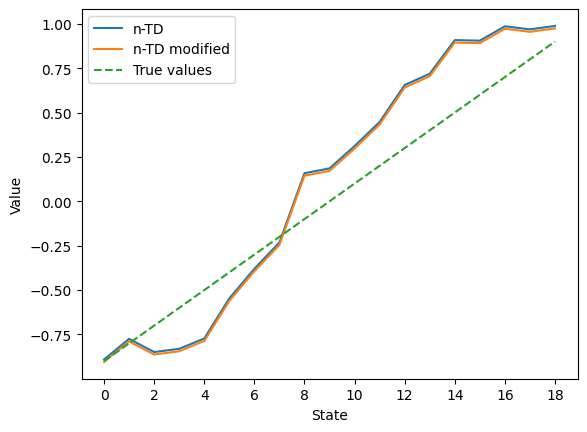

In [12]:
plt.plot(td1.V+0.007, label='n-TD')
plt.plot(td2.V-0.007, label='n-TD modified')
plt.plot(np.arange(1, 20)/20*2-1, '--', label='True values')
plt.xlabel('State')
plt.xticks(range(0, 19, 2))
plt.ylabel('Value')
plt.legend()
plt.show()